# ZOE

In [ ]:
!pip install pygad
!pip install optuna

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygad
import optuna
from statistics import median,mean

## pass the input file path as an argument to function `load_input`

In [3]:
def load_input(file_name):
    with open(file_name, "r") as f:
        lines_all = f.readlines()
    lines = []
    for l in lines_all:
        lines.append(l.strip("\n"))
    
    n = len(lines[0].split())
    m = len(lines)
    arr = []
    for i in range(m):
        arr.append( [int(x) for x in lines[i].split()] )
    return np.array(arr)

In [4]:
""" You can change the file name here """
A = load_input('Q2_input.txt')

In [5]:
fitness_function= lambda solution, solution_idx: sum([1 if item[0]==1 else 0 for item in np.matmul(A,np.array([[ii] for ii in solution]))])

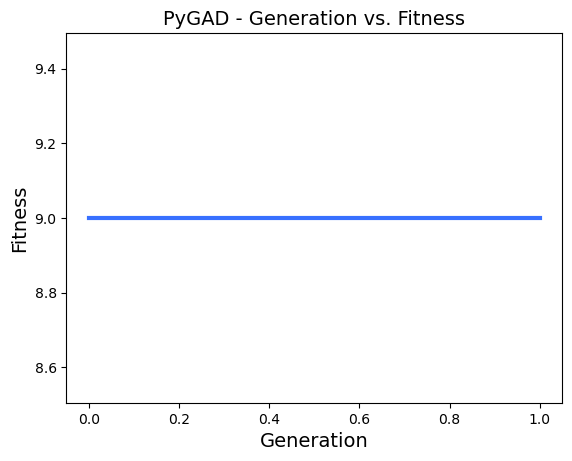

expected: 9, output: 9
Parameters of the best solution : [1. 1. 0. 1. 0.]
Fitness value of the best solution = 9


In [6]:
params = {
        "num_generations":100,
        "sol_per_pop": 50,
        "num_parents_mating":2,
        "crossover_probability":0.8,
        "mutation_probability":0.3,
        "gene_space":[0,1],
        "num_genes":len(A[0]),
        "parent_selection_type":"tournament",
        "stop_criteria":f"reach_{len(A[0])}",
        "fitness_func":lambda solution, solution_idx: sum([1 if item[0]==1 else 0 for item in np.matmul(A,np.array([[ii] for ii in solution]))])
    }


ga_instance = pygad.GA(**params)

ga_instance.run()

# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_fitness()

# input()

solution, solution_fitness, solution_idx = ga_instance.best_solution()

print(f"expected: {len(A)}, output: {sum([1 if item[0]==1 else 0 for item in np.matmul(A,np.array([[ii] for ii in solution]))])}")
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

## Writing the found solution to `Q2_output.txt`

In [7]:
lines =list(solution)
with open('Q2_output.txt', 'w') as f:
    for line in lines:
        f.write(str(line))
        f.write('\n')
